In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
import datetime as dt
import numpy as np
plt.style.use('seaborn-whitegrid')
import pandas as pd
import seaborn as sns
instapouf = pd.read_csv("../../../gruiickode/python/04-plot/data/instapouf.csv", sep=",")
#
instapouf.head()

,date,abo
0,2021-05-17,245
1,2021-05-24,324
2,2021-05-31,382
3,2021-06-04,400
4,2021-06-23,500


le plot simple donne une série aligné sur l'index, pas sur la valeur réelle de date. Deux essais en extrayant l'axe de la date pour le reformater :


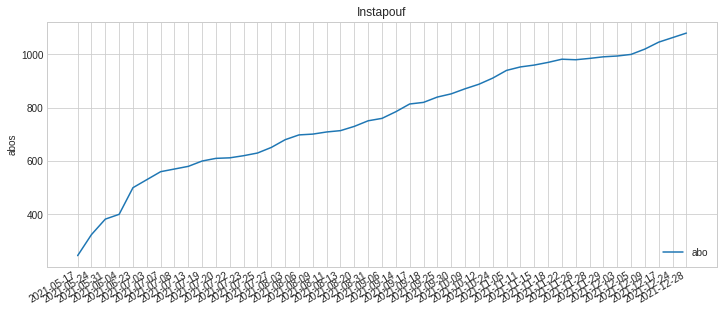

In [2]:
# extract dates
dates = instapouf['date']
dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in dates]

fig, ax = plt.subplots(figsize=(12,5))
plt.title("Instapouf")

#ax.plot('date', 'abo', data=instapouf)
ax.plot('abo', data=instapouf)
ax.xaxis_date()

# set the number of ticks on x-axis to be a list [0, ... ,R]
# R is the number of rows in the data (i.e. len(dates))
# this ensures ticklabels align with the corresponding data point
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels(dates)     # set the ticklabels to the list of datetimes
ax.legend(loc=4, fontsize=10) # make a legend and place in bottom-right (loc=4)
#plt.xticks(rotation=30)       # rotate the xticklabels by 30 deg
ax = ax.set(ylabel='abos')

fig.autofmt_xdate()

#plt.plot(instapouf['date'], instapouf['abo'])
plt.show()

<ipython-input-5-7fe55b26138a>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)


Text(78.0, 0.5, 'Abos')

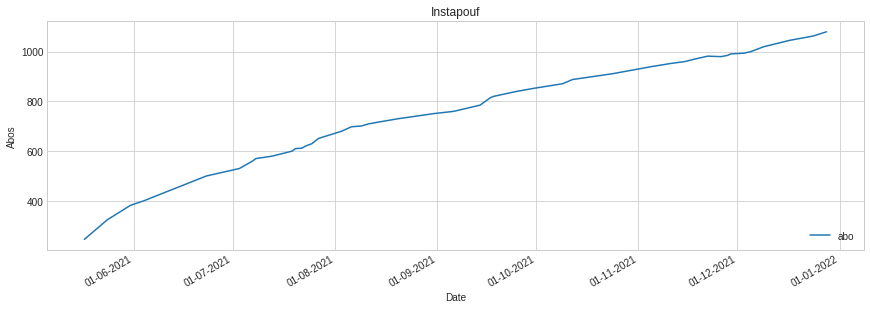

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
#plt.style.use('seaborn')
plt.style.use('seaborn-whitegrid')

data = pd.read_csv('../../../gruiickode/python/04-plot/data/instapouf.csv')
data['date'] = pd.to_datetime(data['date'])
#data.sort_values('date', inplace=True)

plt.subplots(figsize=(12,4))
plt.plot_date(data['date'], data['abo'], label='abo', linestyle='solid', marker=None)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.legend(loc=4, fontsize=10)
plt.title('Instapouf')
plt.xlabel('Date')
plt.ylabel('Abos')
